In [1]:
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
enc = preprocessing.LabelEncoder()

In [2]:
import json
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
import pickle

In [3]:
normal_data = ['./dataset/allNormals1.xml']
anomalies_data = ['./dataset/allAnomalies1.xml', './dataset/allAnomalies2.xml']
attacks_data = ['./dataset/allAttacks1.xml', './dataset/allAttacks2.xml', './dataset/allAttacks3.xml', './dataset/allAttacks4.xml', './dataset/allAttacks5.xml']

In [4]:
def get_data():
    
    data = pd.DataFrame()

    for filePath in normal_data:
        df1 = pd.read_xml(filePath, xpath='.//request')
        df1['label'] = 'normal'

    for filePath in anomalies_data:
        df2 = pd.read_xml(filePath, xpath='.//request')
        df2['label'] = 'anomalous'

    for filePath in attacks_data:
        df3 = pd.read_xml(filePath, xpath='.//request')
        df3['label'] = 'attack'

    frames = [df1, df2, df3]

    data = pd.concat(frames)
    data = data.reset_index(drop=True)
    # print(data.head())
    return data


In [8]:
def convert_data(data):
    converted_data = pd.DataFrame()
    classes = {}

    data_columns = data.columns.values.tolist()
#     print(data_columns)
    for i in data_columns:
        converted_data[i] = enc.fit_transform(data[i])
#         print(enc.classes_)
        classes[i] = enc.classes_
#     print(classes['label'])
    return converted_data, classes
# t = convert_data(get_data())

In [24]:
data = get_data()
# print(data)
converted_data, classes = convert_data(data)
with open('classes.json', 'wb') as fp:
    pickle.dump(classes, fp)


model = KNeighborsClassifier(n_neighbors=3)
data_columns = data.columns.values.tolist()



In [27]:
data.head()

,method,protocol,path,headers,query,body,label
0,GET,HTTP/1.1,/tienda1/,Host: localhost:8080\nUser-Agent: Mozilla/5.0 ...,None,None,normal
1,GET,HTTP/1.1,/tienda1/publico/productos.jsp,Host: localhost:8080\nUser-Agent: Mozilla/5.0 ...,None,None,normal
2,GET,HTTP/1.1,/tienda1/publico/caracteristicas.jsp,Host: localhost:8080\nUser-Agent: Mozilla/5.0 ...,id=3,None,normal
3,GET,HTTP/1.1,/tienda1/imagenes/3.gif,Host: localhost:8080\nUser-Agent: Mozilla/5.0 ...,None,None,normal
4,GET,HTTP/1.1,/tienda1/publico/caracteristicas.jsp,Host: localhost:8080\nUser-Agent: Mozilla/5.0 ...,id=2,None,normal


[2 1 2 ... 2 2 0]


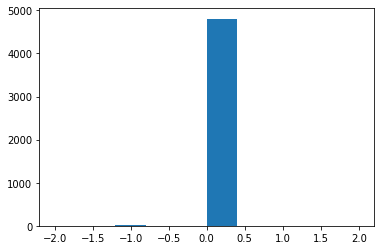

In [25]:
x = converted_data[['method', 'protocol', 'path', 'headers', 'query', 'body']]

y = converted_data['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model.fit(x_train, y_train)

predictions = model.predict(x_test)
print(predictions)

# plt.hist(y_test - predictions)
# plt.show()


In [26]:
# y_test
# predictions
acc = accuracy_score(y_test, predictions)
print(acc)

0.9954423037083074


In [ ]:
data = get_data()
x = data[['method', 'protocol', 'path', 'headers', 'query', 'body']]

y = data['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(x_train, y_train)

In [ ]:
pipe.score(x_test, y_test)

In [ ]:
clf = SVC()
clf.fit(x_train, y_train)

In [ ]:

filename = 'threat_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
load_model = pickle.load(open('threat_model.pkl', 'rb'))

In [ ]:
load_model.predict(x_test)

In [ ]:
# x_test['method'].values[0]
data = {'method':[0], 'protocol':[0], 'path':[0], 'headers':[0], 'query':[0], 'body':[0]}
t = pd.DataFrame(data)
p = load_model.predict(t)

In [ ]:
with open('classes.json', 'rb') as fp:
    classes_data = pickle.load(fp)
classes_data

In [9]:
classes

{'method': array(['GET', 'HEAD', 'POST'], dtype=object),
 'protocol': array(['HTTP/1.1'], dtype=object),
 'path': array(['/', '/examples/jsp/', '/examples/jsp/cal/cal1.jsp',
        '/examples/jsp/checkbox/checkresult.jsp',
        '/examples/jsp/colors/colrs.jsp', '/examples/jsp/error/err.jsp',
        '/examples/jsp/jsp2/el/functions.jsp',
        '/examples/jsp/jsp2/el/implicit-objects.jsp',
        '/examples/jsp/jsp2/jspx/textRotate.jspx',
        '/examples/jsp/num/numguess.jsp',
        '/examples/jsp/security/protected/j_security_check',
        '/examples/jsp/sessions/carts.jsp', '/examples/servlets/',
        '/examples/servlets/servlet/CookieExample',
        '/examples/servlets/servlet/RequestParamExample',
        '/examples/servlets/servlet/SessionExample', '/tienda1/',
        '/tienda1/global/estilos.css', '/tienda1/imagenes/1.gif',
        '/tienda1/imagenes/3.gif', '/tienda1/imagenes/logo.gif',
        '/tienda1/imagenes/nuestratierra.jpg',
        '/tienda1/miembros/